In [1]:
import sympy as smp
from sympy.abc import theta, phi
from sympy import *
from sympy import trigsimp
import numpy as np
from IPython.display import display, Math
smp.init_printing()

# Part C

## Define Symbols

Define the symbols we will use in this problem. Note that $q_1$ corresponds to $q'$, $q_2$ corresponds to $q''$, and the same with $t_1$ and $t_2$.

In [2]:
q1, q2, t1, t2, W, m, t = smp.symbols('q_1 q_2 t_1 t_2 \Omega m t', real=True)

## Define the Path q(t)

Define $A$ and $B$ as specified in the written problem. We print $A$ and $B$ below.

In [3]:
A = (q1*smp.exp(smp.I * W * t1) - q2*smp.exp(smp.I * W * t2))/(smp.exp(2*smp.I * W * t1) - smp.exp(2*smp.I * W * t2))
B = (q1*smp.exp(-smp.I * W * t1) - q2*smp.exp(-smp.I * W * t2))/(smp.exp(-2*smp.I * W * t1) - smp.exp(-2*smp.I * W * t2))

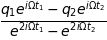

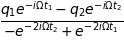

In [4]:
display(A)
display(B)

Now we define $q$ as specified in the problem. We show that the initial conditions are satisfied given the above values of $A$ and $B$.

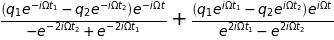

In [5]:
q = A*smp.exp(smp.I*W*t) + B*smp.exp(-smp.I*W*t)
q

In [6]:
display(q.subs(t,t1).simplify())
display(q.subs(t,t2).simplify())

## Get the Lagrangian and the Action

Here we define the Lagrangian. This quantity minimizes the action when integrated from $t_1$ to $t_2$.

In [7]:
L = (m/2)* (q.diff(t)**2 - W**2 * q**2)
L = L.simplify()

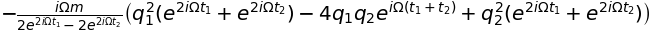

In [56]:
S = integrate(L, (t, t1, t2),  conds='none').simplify()
S.collect(q1).collect(q2)

Note that this can be written as

$$\frac{m\Omega}{2\sin(\Omega(t_2-t_1))}\left[(q_1^2+q_2^2)\cos(\Omega (t_2-t_1)) -2q_1q_2\right] $$

Now we show that in the limit $\Omega \to 0$ we get the result for the free particle. This limit clearly uses L'Hopital's rule since we have 0/0 when $\Omega \to 0$.

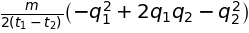

In [9]:
limit(S, W, 0).simplify()

Note that this can be rewritten as

$$\frac{m}{2}\frac{(q_2-q_1)^2}{(t_2-t_1)} $$

which is what was derived in class.

# Part E

In [65]:
S = (m*W/2)*( (q1**2+q2**2)*smp.cot(W*(t2-t1)) - 2*q1*q2*smp.csc(W*(t2-t1)) )

In [66]:
S

In [98]:
expr = -1/(2*m) *(smp.I*diff(S,q2,q2)-diff(S,q2)**2) + (m/2)*W**2 * q2**2

In [99]:
expr = expr.rewrite(exp).simplify().trigsimp()

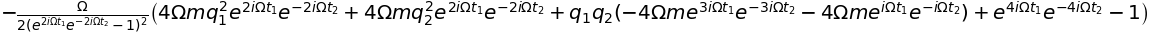

In [100]:
expr.simplify().factor(q1,q2).trigsimp()